# Optimization for Machine Learning, lecture 2 - 26/01/2021

In [2]:
from IPython.display import Image

<hr>

We want to minimize $R_s(h)$ (**empirical risk minimization**). But we don't have an algorithm for it.

The function $h$ is parametrized ($h\in H$) by a vector or coefficient of parameters $W$.

$h(x) = \underset{i=1}{\overset{n}{\sum}} w_i . x_i$

$h(w, x) = \underset{i=1}{\overset{n}{\sum}} w_i . x_i$

$R_s(h) = \underset{i=1}{\overset{|S|}{\sum}} l(h, (x_i, y_i))$

**ex**. $R_s(h) = \underset{i=1}{\overset{|S|}{\sum}} l(h(w, x_i) - y_i)^2 = \underset{i=1}{\overset{|S|}{\sum}} f(w, i)$ (regression)

$$F(w) = R_s(h)$$

Our problem becomes: $\underset{w\in \mathbb{R}^d}{minimize} F(w)$

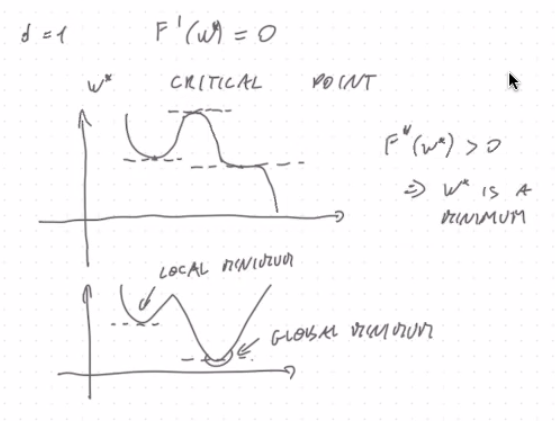

In [3]:
Image('pictures/optima.png', width=600)

$$F(w_1^2+w_2^2)$$
$$\frac{\delta F}{\delta w_1} = 2.w_1$$
$$\frac{\delta F}{\delta w_2} = 2.w_2$$

$$\nabla F(w) = [2.w_1, 2.w_2]^T$$

The function is growing the most in the direction where the vector $\nabla F(w)$ is growing the most.

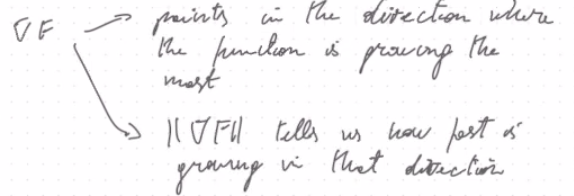

In [4]:
Image('pictures/gradient.png', width=600)

$\nabla F$ gives the direction of maximum increase of F. It is orthogoal to the isolevel curve of the function

$w^* \in {argmin}\, F(w) \Rightarrow \nabla F(w^*) = [0,0,...,0]^T$

We are looking for points where the gradients are equal to zero ($\frac{\delta F}{\delta w_1} = 0$, $\frac{\delta F}{\delta w_2}=0$)

$H_f(w)$ is a **hessian** matrix such that $[H_F(w)]_{i,j} = \frac{\delta^2}{\delta w_i . \delta w_j}F(w)$

**ex**. 
$$H_F(w) = \big(\begin{smallmatrix} 2 & 0\\ 0 & 2 \end{smallmatrix}\big)$$
$$\frac{\delta^2}{\delta w_i . \delta w_j}F(w) = 2$$
$$F''(w) \Leftrightarrow H_F(w)$$

$F''(w) \ge 0 \underset{?}{\Rightarrow} H_f(w)$ is semidefinite positive

$\forall x \in \mathbb{R}^d,\, x^T.H_F(w)x\ge 0$


$F''(w) \ge 0 \Rightarrow H_f(w)$ is semidefinite positive

$\forall x \in \mathbb{R}^d-\{0\},\, x^T.H_F(w)x\gt 0$

$H_F(w)$ is positive semidefinite $\forall x \in \mathbb{R}^d,\, x^T.H_F(w)x\ge 0$

for $d=1$, $H_F(w) = [\frac{\delta^2H_f}{\delta^2 w_1}] = H''_F(w)$

$x H''_F(w)x = x^2.H''_F(w) \ge 0 \Rightarrow x^2 \ge 0 \Rightarrow H''_F(w) \ge 0$

$H_F(w)$ computes singular values. $A$ is diagonalisable if: $A=U.D.U^T$ such that $U^T.U=I$ with $U$ an orthogonal matrix.

$\big(\begin{smallmatrix} \alpha_1 & 0 & 0 \\ 0 & \alpha_2 & 0\\ 0 & 0 & \alpha_3\end{smallmatrix}\big)$ with $\alpha_i$ eigenvalues.

$A=U.D.U^T$, $A.U=U.D.U^T.U$, $A.U=U.D$, with $A.u_i = \alpha_i-u_i$ with $U$ the matrix of eigenvectors

$A=A^T\Rightarrow A$ is diagonalizable. 

- $H_F=H_F^T$

- $H_F(w) = U.D.U^T$

- $H_F$ is positive semidefinite **IFF** $ \alpha_i \ge 0 \forall i$

- $H_F$ is positive definite **IFF** $ \alpha_i \gt 0 \forall i$

Imagine $\alpha_i \lt 0$ then $u_j^T.H_F.u_j = j^T.\alpha_j.u_j = ||u_j||^2\alpha_j \lt 0$

$\Rightarrow H_F$ is not positive semidefinite

### Convexity

A **convex set** is a set of points where the segment between any two points is also in the set.

$$\forall x, y \in A, \forall \alpha \in [0,1], \alpha.x + (1-\alpha).y \in A$$

A **convex function** $F$ if $\forall x, y \forall \alpha\in[0,1], f(\alpha.x+(1-\alpha).y)\le \alpha.f(x)+(1-\alpha).f(y)$

We care about convexity because machine learning is about a **convex optimization problem**: $\underset{w\in W}{minimize} F(w)$
- $W$ is a convext set
- $F$ is a convex function
In a convex opt problem if $\nabla F(w^*) = 0 \Rightarrow w^*$ is a local minimum

1. $w^*$ is a local minimum

2. if $w^*$ is a local minimum it is also a global minimum

Consequently, there are **efficient algorithms to solve convex optimization problems**.

Classification problem:

- $l(h,(x_i, y_i)) = \mathbb{1}_{h(x_i)\neq y_i})$ natural choice
- common choice (cross entropy loss): $l(h,(x_i, y_i)) = y.log(h(x)) + (1-y).log(1-h(y))$ with $h(x) = X^T.x$

This loss is differentiable and is convex in W.

**Surrogate Loss** because the natural choice may be NP-Hard. We pick $L_{sur}(h, (x,y))$ because:

$$L_{nat}(h, (x,y)) \ge L_{sur}(h, (x,y))$$
$$L_{sur}(h, (x,y))\, {is}\, {convex}$$ 

### Gradient Descent

$W_k+1 = w_k - \alpha_k.\nabla F(W_k)$ with $\alpha_k$ the **learning rate**.

$$F(w) = \underset{i=1}{\overset{|S|}{\sum}} f(w,i)$$

$$w_{k+1} = w_k - \alpha.\nabla.F(w_k)$$

At every iteration, you take only one point in the dataset uniformly at random $\zeta$.

$$w_{k+1} = w_k - \alpha.\nabla.F(w_k, \zeta)$$ (stochastic gradient method descent)

You can pick a random subset $\zeta_k$ of samples from the dataset such that: $\frac{1}{|\zeta_k|}\underset{i=1}{\overset{|\zeta_k|}{\sum}} \nabla.f(z,\zeta_{k,i})$ with $\zeta_k = \{\zeta_{k, 1},..., \zeta_{k, n}\}$

**Why not always full batch?**

1. I may not have enough memory -- $\zeta \in S$, ${minimize}\, \underset{(x_i, y_i)\in\tilde{S}}{\sum} l(h,(x_i, y_i))$

2. Noise can be useful overfitting. FB could converge to any of them

3. The noise can help avoid getting stuck in bad critical points

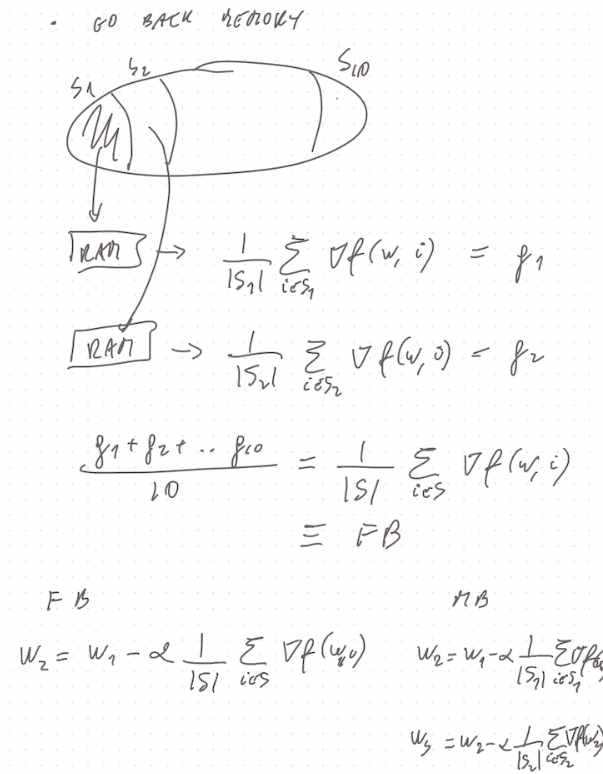

In [5]:
Image('pictures/minibatch.png', width=600)

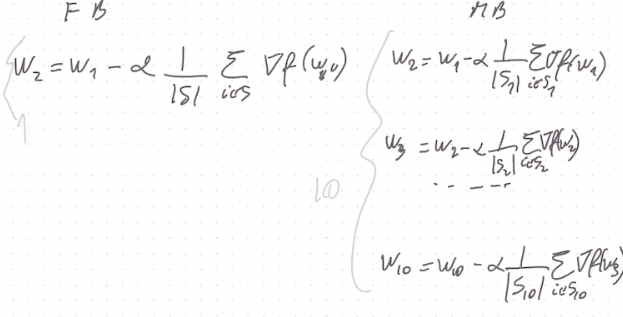

In [6]:
Image('pictures/gradient2.png', width=600)

**Is it better to do 1 precise update (full batch) or 10 not-so precise update (multi-batch)?**

When we are far from the minimum. SGD gives us the right direction.

When we are close to the minimum SGD can get confused

**IDEA**: Start with small $\alpha_k$ and progressively increase $\alpha_k$ variance reduction.

**Theoretical results**:

- FB: $R_s(w_\alpha) - R_S(w^*) \approx p^k$, $p \lt 1$

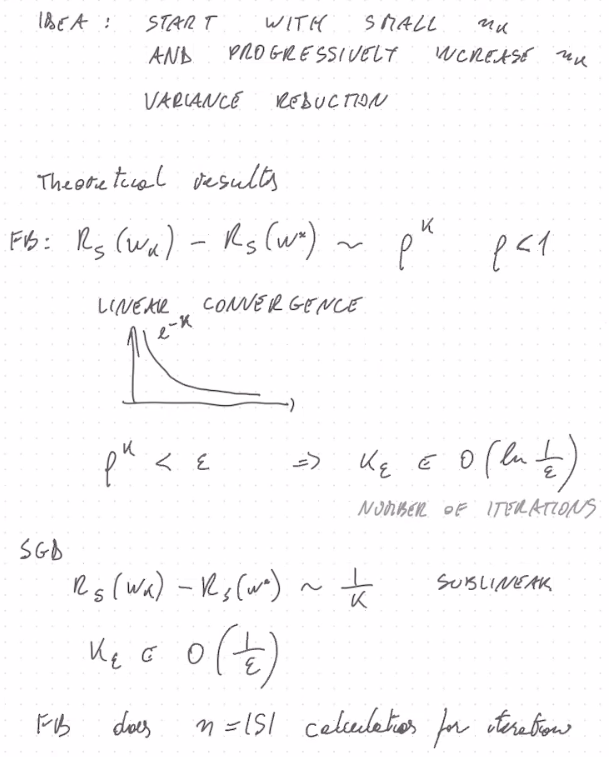

In [7]:
Image('pictures/SGD.png', width=600)